<a href="https://colab.research.google.com/github/supsi-dacd-isaac/TeachDecisionMakingUncertainty/blob/main/FORM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We consider a system/model whose performance is characterized by a function $ g(x;\theta) $, where $\theta$ are model parameters and $x$ are random variables distributed as $f_X(x), x \in \mathcal{X}$. A model with parameters $\theta$ fails to perfom adequatelly in $x$ if $ g(x;\theta) \leq 0 $.

We define a failure set/domain as:
$$\mathcal{F}(\theta) = \{x \in \mathcal{X}: g(x;\theta) \leq 0  \}$$

Simlarly, a safe/reliable domain is given as the complement $\mathcal{X} ∖ \mathcal{F}(\theta)$ and it is defined follows:
$$\mathcal{R}(\theta) = \{x \in \mathcal{X}: g(x;\theta) > 0  \}  $$



We are interested in quantifying the probability
$$P_f(\theta) = \mathbb{P}[g(x;\theta) \leq 0]= \int\limits_{\mathcal{F}(\theta)} f_X(x) dx, $$
$$R(\theta) = \mathbb{P}[g(x;\theta) > 0]= 1- P_f(\theta) $$
which is an useful indicator to help with the selection of a good $\theta$.   

## **Examples** g(x,\theta)

### 1. **Structural Reliability (Structures/Loads)**
In structural engineering, the performance function $g(x, \theta)$ often represents the difference between the **resistance** of a structure and the **stress** applied to it:
$$
g(x, \theta) = \text{Resistance}(\theta) - \text{Stress}(x),
$$
where:
- $\theta$ represents the parameters defining the structural resistance (e.g., material properties, geometry).
- $x$ represents the random variables describing the applied loads or environmental conditions.

The system fails when $g(x, \theta) \leq 0$, indicating that the stress exceeds the resistance.

 ----

### 2. **Machine Learning Models (Predictors)**
In ML, the performance function $g(x, \theta)$ can represent the difference between a **point-wise performance metric** and a **threshold** that defines acceptable performance for a single data point:
$$
g(x, \theta) = \text{Metric}(x,\theta) - \text{Threshold}(x,\theta),
$$
where:
- $\theta$ represents the model parameters (e.g., weights in a neural network, coefficients in a regression model, etc.).
- $x$ represents the input data (including features and the true target $y$).
- $\text{Metric}$ is a point-wise performance metric computed for the single data point $x$.
 :
  -  **Squared Error (SE)**:   $  \text{SE}(\theta; x) = (y - f(x, \theta))^2, $
  -   **Absolute Error (AE)**:   $ \text{AE}(\theta; x) = |y - f(x, \theta)|.  $


The system fails when $g(x, \theta) \leq 0$, indicating that the model's performance on the data point $x$ falls below the acceptable threshold.

 ----



**Introduction to Probability Estimation**

Estimating probabilities is fundamental in various fields, including engineering, finance, and science. A common approach involves using Monte Carlo simulations, where a model is evaluated numerous times to estimate the likelihood of specific outcomes. This method is particularly useful when dealing with complex systems where analytical solutions are intractable.

### Estimation of $P_f(\theta)$ and $R(\theta)$

### 1. Monte Carlo (MC) Estimation

Monte Carlo estimation provides a sample-based approach to approximate the failure probability $P_f(\theta)$ or equivalently $R(\theta)$.

### Steps:
1. **Sampling**:
   Draw $N$ independent samples $\{x_i\}_{i=1}^N$ from the distribution $f_X(x)$.

2. **Evaluate $g(x; \theta)$**:
   For each sample $x_i$, evaluate $g(x_i; \theta)$. Define an indicator function:

   $$
   \mathbb{I}(x_i \in \mathcal{F}(\theta)) =
   \begin{cases}
   1 & \text{if } g(x_i; \theta) \leq 0, \\
   0 & \text{otherwise.}
   \end{cases}
   $$



3. **Estimate Failure Probability**:
   The Monte Carlo estimate of $P_f(\theta)$ is:

   $$
   \hat{P}_f(\theta) = \frac{1}{N} \sum_{i=1}^N \mathbb{I}(g(x_i; \theta) \leq 0).
   $$



4. **Estimate Reliability**:
   Using the complement, the estimate for $R(\theta)$ is:


   $$
   \hat{R}(\theta) = 1 - \hat{P}_f(\theta).
   $$



5. **Convergence**:
   By the law of large numbers, $\hat{P}_f(\theta)$ and $\hat{R}(\theta)$ converge to their true values as $N \to \infty$. The standard error decreases as $\mathcal{O}(1/\sqrt{N})$.

---

## 2. Analytical Estimation

In a few cases, an analytical expression for $P_f(\theta)$ may be derived. This depends on the form of $g(x; \theta)$ and the probability distribution $f_X(x)$.

### Case 1: Linear $g(x; \theta)$
If $g(x; \theta)$ is linear in $x$, i.e., $g(x; \theta) = a^T x + b$, and $f_X(x)$ is Gaussian $\mathcal{N}(\mu, \Sigma)$, the failure probability can sometimes be expressed using cumulative distribution functions:
$$
P_f(\theta) = \mathbb{P}(a^T x + b \leq 0) = \Phi\left(\frac{-b - a^T \mu}{\sqrt{a^T \Sigma a}}\right),
$$
where $\Phi(\cdot)$ is the CDF of the standard normal distribution.

### Case 2: Quadratic $g(x; \theta)$
If $g(x; \theta)$ is quadratic in $x$ and $f_X(x)$ is Gaussian, analytical solutions may still be possible, but they require advanced techniques (e.g., integration over ellipsoids).

### Case 3: Indicator Distributions
If $f_X(x)$ is a uniform distribution over $\mathcal{X}$, integration is straightforward:
$$
P_f(\theta) = \int_{\mathcal{F}(\theta) \cap \mathcal{X}} f_X(x) dx = \frac{\text{Volume of } \mathcal{F}(\theta) \cap \mathcal{X}}{\text{Volume of } \mathcal{X}}.
$$

### Challenges of Analytical Methods:
- Intractability for nonlinear or high-dimensional $g(x; \theta)$.
- Dependence on specific forms of $f_X(x)$.

---

## 3. Computational Issues

### Curse of Dimensionality
- The computational cost of numerical integration or Monte Carlo methods increases exponentially with the dimensionality of $\mathcal{X}$.
- **Mitigation**: Variance reduction techniques like importance sampling, stratified sampling, or quasi-Monte Carlo methods.

### Rare Event Problem
- When $P_f(\theta)$ is very small (e.g., in highly reliable systems), standard Monte Carlo methods become inefficient because very few samples fall into $\mathcal{F}(\theta)$.
- **Solution**: Use **importance sampling**, where samples are drawn from a distribution that overrepresents the failure domain, and the results are weighted to reflect $f_X(x)$.



**Estimating Rare Event Probabilities**

When the event of interest is rare (e.g., $ P_f \approx 10^{-5} $), standard Monte Carlo simulations become computationally expensive. To achieve a relative error of 10%, the required number of samples $ N $ can be calculated as:

$$
N = \frac{100}{P_f}
$$

For $ P_f = 10^{-5} $:

$$
N = \frac{100}{10^{-5}} = 10^7 \, \text{samples}
$$

If each evaluation of $ g(x; \theta) $ takes 60 seconds, the total computation time would be:

$$
10^7 \, \text{samples} \times 60 \, \text{seconds/sample} = 600 \, \text{million seconds} \approx 19 \, \text{years}
$$

**Conclusion**

Direct Monte Carlo simulation is impractical for estimating such rare event probabilities due to the prohibitive computational cost. Employing variance reduction techniques, such as importance sampling, is essential to make the estimation feasible. :contentReference[oaicite:0]{index=0}





### Nonlinear Models
- Nonlinear $g(x; \theta)$ may lead to non-convex failure domains $\mathcal{F}(\theta)$, complicating integration.
- **Solution**: Approximate $g(x; \theta)$ locally using linear or quadratic models or apply machine learning-based surrogates to estimate the failure probability.

### Gradient Computation for Optimization
- If $g(x; \theta)$ is differentiable, methods like stochastic gradient descent or adjoint methods can optimize $\theta$ directly to minimize $P_f(\theta)$.
- For non-differentiable $g(x; \theta)$, gradient-free methods (e.g., genetic algorithms) may be necessary.

---

## Summary

- **Monte Carlo methods** are the most versatile for estimating $P_f(\theta)$ and $R(\theta)$ but can be computationally expensive for high-dimensional problems or rare events.
- **Analytical methods** are efficient when applicable but are limited to specific forms of $g(x; \theta)$ and $f_X(x)$.
- **Computational challenges** can be addressed with advanced techniques like importance sampling, surrogate modeling, or gradient-based optimization.


In [4]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
import scipy.stats as stats

In [8]:
# Joint PDF
def joint_pdf_independent(x, obj_dist_x):
    """
    Joint PDF of x1 and x2.
    Args:
        x1, x2: Input variables.
        dist_obj_x1, dist_obj_x2: Distribution objects for x1 and x2.
    Returns:
        Value of the joint PDF.
    """
    fx = 1
    for xi, fx in zip(x,obj_dist_x):
        fx *= fx.pdf(xi)

    return fx

# Joint CDF
def joint_cdf_independent(x, obj_dist_x):
    """
    Joint CDF of x1 and x2.
    Args:
        x1, x2: Input variables.
        dist_obj_x1, dist_obj_x2: Distribution objects for x1 and x2.
    Returns:
        Value of the joint CDF.
    """
    fx = 1
    for xi, fx in zip(x,obj_dist_x):
        fx *= fx.cdf(xi)

    return fx


In [12]:
# problem specific performance function:

 # Define the Performance Function g(x)
def g_fun(x1, x2, params=None):
    """
    Performance function g(x).
    Args:
        x1, x2: Input variables.
        params: Optional parameters for the function.
    Returns:
        Value of the performance function.
    """
    if params is None:
        params = [1, 1]

    return (x1 + 3 + params[1] * params[0])**2 + params[0] * 3 * (x2 + 2)**2 - 12

# Define the Indicator Function I(x)
def I_fun(x1, x2):
    """
    Indicator function I(x).
    Args:
        x1, x2: Input variables.
    Returns:
        1 if g(x) <= 0 (bad performance), 0 otherwise.
    """
    return g_fun(x1, x2) <= 0

Monte Carlo Estimate of P[g(x) <= 0]: 1.6e-06
Monte Carlo Estimate of P[g(x) > 0]: 0.9999984


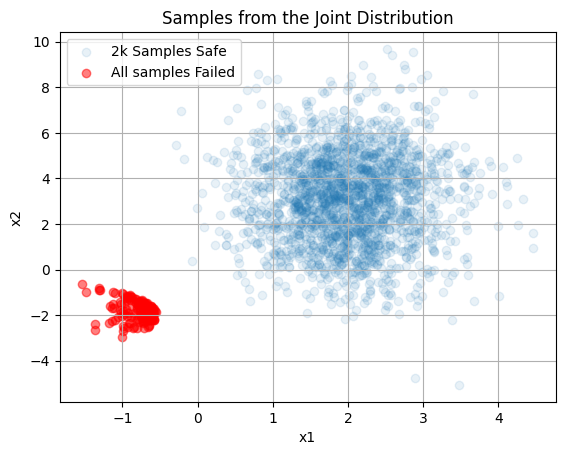

In [16]:

# Define the Joint Probability Distribution f(x1, x2)
# Define distribution parameters
mu_x1, mu_x2 = 2, 3
sigma_x1, sigma_x2 = 0.7, 2

# Define normal distribution objects
f_x1 = stats.norm(loc=mu_x1, scale=sigma_x1)
f_x2 = stats.norm(loc=mu_x2, scale=sigma_x2)


# Monte Carlo Estimation
sample_size = 100_000_000
samples_x1 = f_x1.rvs(size=sample_size)
samples_x2 = f_x2.rvs(size=sample_size)
I_sams = I_fun(samples_x1, samples_x2)
mc_estimate_pof = np.mean(I_sams)

print(f"Monte Carlo Estimate of P[g(x) <= 0]: {mc_estimate_pof}")
print(f"Monte Carlo Estimate of P[g(x) > 0]: {1- mc_estimate_pof}")

# Visualization
n2p = 2
plt.scatter(samples_x1[:n2p*1000], samples_x2[:n2p*1000], alpha=0.1, label=f"{n2p}k Samples Safe")
plt.scatter(samples_x1[I_sams==1], samples_x2[I_sams==1], alpha=0.5, c='r', label="All samples Failed")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Samples from the Joint Distribution')
plt.legend()
plt.grid()
plt.show()

In [17]:
# Define means and standard deviations for X1 and X2
mu_X1, sigma_X1 = 200, 20
mu_X2, sigma_X2 = 150, 10

# Define the performance function parameters in U-space
gradient_g = np.array([20, 10])  # Gradient components of g(U)
g_u0 = 50  # Performance function at U = (0,0)

# Compute the magnitude of the gradient
norm_gradient = np.linalg.norm(gradient_g)

# Compute the reliability index beta
beta = abs(g_u0) / norm_gradient

# Compute the probability of failure
pf = norm.cdf(-beta)

print(f"Reliability index (β): {beta:.4f}")
print(f"Probability of failure (P_f): {pf:.4f}")

Reliability index (β): 2.2361
Probability of failure (P_f): 0.0127


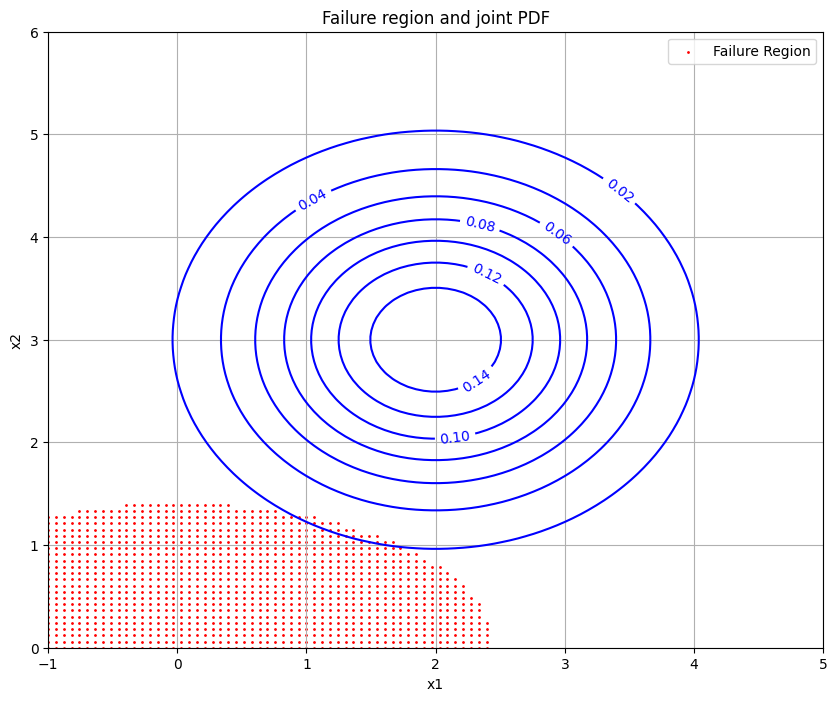

In [18]:
# Define the normal distributions for x1 and x2
mu_x1, mu_x2 = 2, 3
sigma_x1, sigma_x2 = 1, 1

# Create a grid of points for x1 and x2
x1_range = np.linspace(mu_x1 - 3*sigma_x1, mu_x1 + 3*sigma_x1, 100)
x2_range = np.linspace(mu_x2 - 3*sigma_x2, mu_x2 + 3*sigma_x2, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)


# Calculate the joint probability density function (PDF)
f_x1_x2 = norm.pdf(X1, loc=mu_x1, scale=sigma_x1) * norm.pdf(X2, loc=mu_x2, scale=sigma_x2)

# Plot the iso-probability curves of f(x1, x2)
plt.figure(figsize=(10, 8))
CS = plt.contour(X1, X2, f_x1_x2, levels=7, colors='blue')
plt.clabel(CS, inline=1, fontsize=10)

# Plot the failure region defined by I(x)
failure_region = np.where(I(X1, X2) == 1)
plt.scatter(X1[failure_region], X2[failure_region], color='red', s=1, label='Failure Region')
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Failure region and joint PDF')
plt.legend()
plt.show()

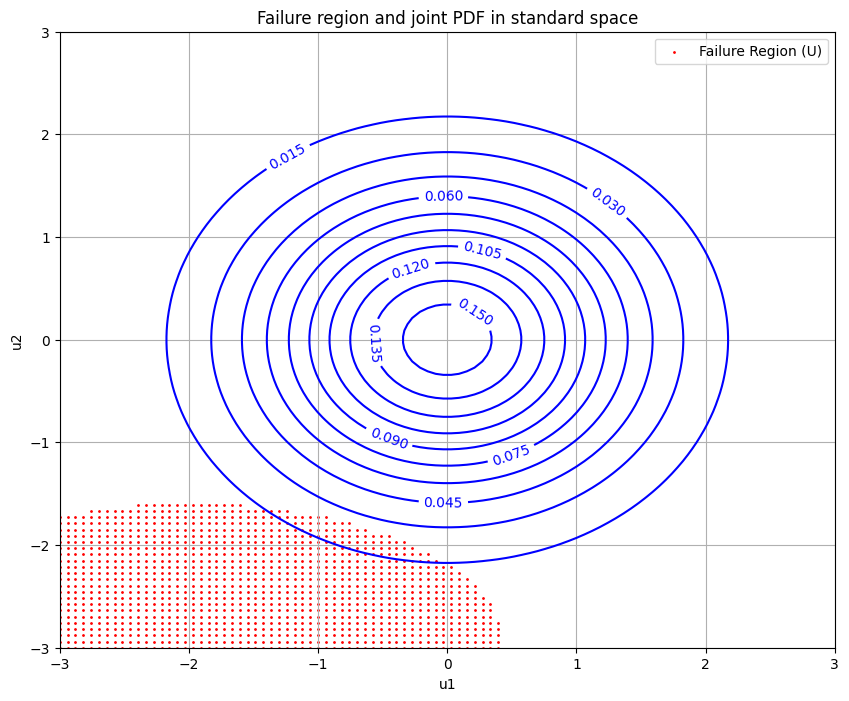

In [ ]:

# Data transformation to standard space: x -> u Hasofer-Lind 2nd Moment transformation
U1 = (X1 - mu_x1) / sigma_x1
U2 = (X2 - mu_x2) / sigma_x2


# Transform g(x) to g(u)
def g_u(u1, u2):
    x1 = u1 * sigma_x1 + mu_x1
    x2 = u2 * sigma_x2 + mu_x2
    return g(x1, x2)

# Define the indicator function in the standard space
def I_u(u1,u2):
    return g_u(u1,u2) <= 0

# Calculate the joint PDF in the standard space
f_u1_u2 = norm.pdf(U1, loc=0, scale=1) * norm.pdf(U2, loc=0, scale=1)

# Plot I(u) and f(u)
plt.figure(figsize=(10, 8))
CS = plt.contour(U1, U2, f_u1_u2, levels=10, colors='blue')
plt.clabel(CS, inline=1, fontsize=10)

failure_region_u = np.where(I_u(U1, U2) == 1)
plt.scatter(U1[failure_region_u], U2[failure_region_u], color='red', s=1, label='Failure Region (U)')
plt.grid()
plt.xlabel('u1')
plt.ylabel('u2')
plt.title('Failure region and joint PDF in standard space')
plt.legend()
plt.show()

In [ ]:


"""def HasoferLind(X1,X2, mu_x1, mu_x2,sigma_x1,sigma_x2):
      U1 = (X1 - mu_x1) / sigma_x1
      U2 = (X2 - mu_x2) / sigma_x2
      return U1,U2


def Rosenblatt(X1, X2, cdf_X1, cdf_X2):
    U1 = norm.ppf(cdf_X1)
    U2 = norm.ppf(cdf_X2)
    return U1, U2


def Nataf(X1, X2, mu_x1, mu_x2, sigma_x1, sigma_x2, correlation_matrix):
    # Standardize the variables
    Rosenblatt(X1, X2, cdf_X1, cdf_X2)

    # Apply the correlation matrix
    U = np.array([U1, U2])
    U_transformed = np.dot(correlation_matrix, U)
    return U_transformed[0], U_transformed[1]"""

BeartypeCallHintParamViolation: Method UQpy.transformations.Decorrelate.Decorrelate.__init__() parameter samples_z="None" violates type hint <class 'numpy.ndarray'>, as <class "builtins.NoneType"> "None" not instance of <protocol "numpy.ndarray">.

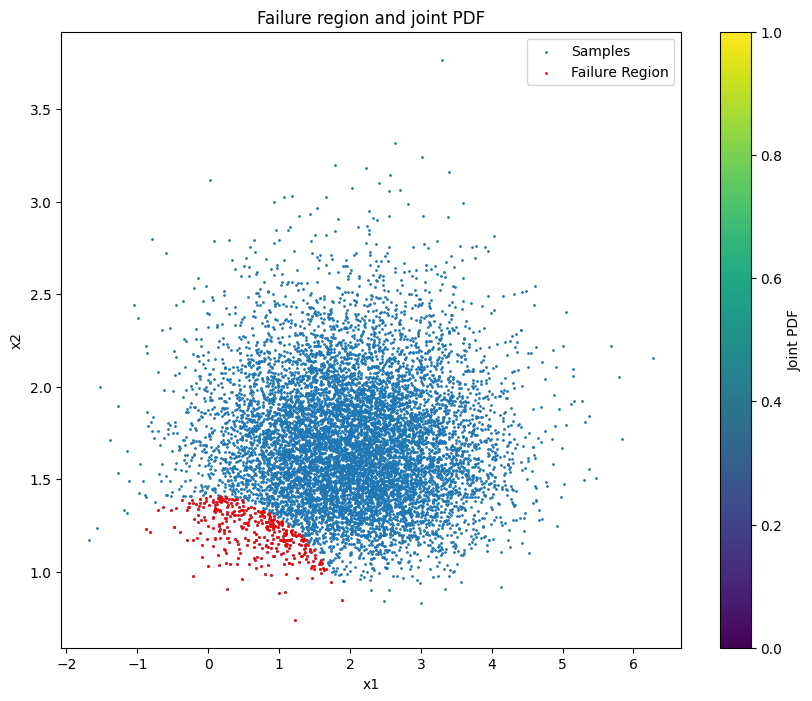

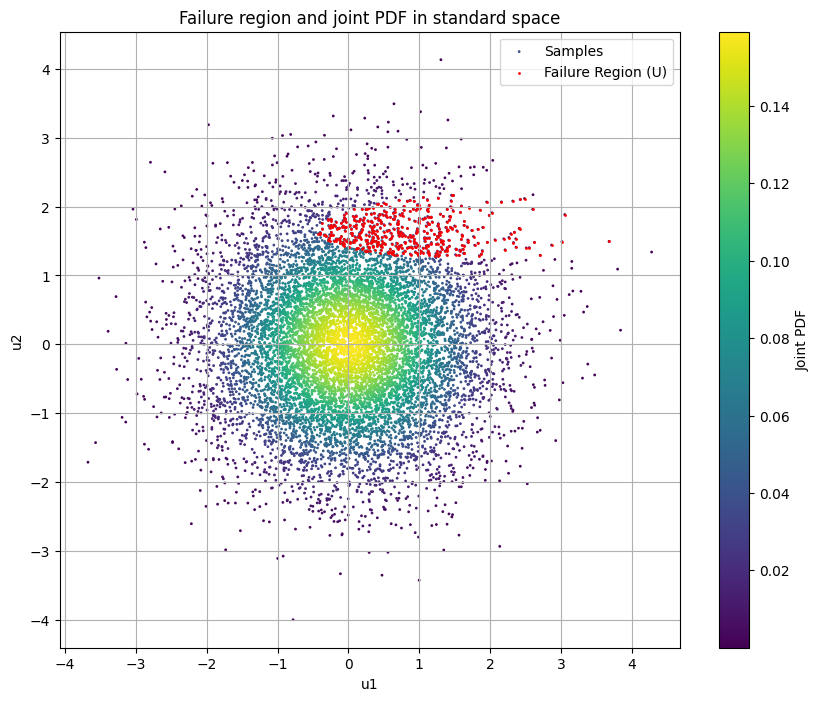

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# Define the distributions for x1 and x2 (x1 normal, x2 lognormal)
mu_x1, sigma_x1 = 2, 1  # Normal distribution parameters
mu_x2, sigma_x2 = 0.5, 0.2  # Lognormal distribution parameters (mu, sigma on the log scale)

# Sampling from the distributions
num_samples = 10000  # Number of samples to generate
X1 = np.random.normal(loc=mu_x1, scale=sigma_x1, size=num_samples)  # Sample from normal distribution for x1
X2 = np.random.lognormal(mean=mu_x2, sigma=sigma_x2, size=num_samples)  # Sample from lognormal distribution for x2

# Plot the joint PDF of x1 and x2
plt.figure(figsize=(10, 8))
plt.scatter(X1, X2, s=1, label='Samples')
plt.colorbar(label='Joint PDF')
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Joint PDF of x1 and x2 (samples)')

# Define the non-transformed limit state function g(x)
def g(x1, x2):
    return x1**2 + 3*x2**2 - 6

# Define the indicator function I(x) for failure region
def I(x1, x2):
    return g(x1, x2) <= 0  # Failure region where g(x) <= 0

# Plot the failure region in the original space
failure_region = np.where(I(X1, X2) == 1)
plt.scatter(X1[failure_region], X2[failure_region], color='red', s=1, label='Failure Region')
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Failure region and joint PDF')
plt.legend()
plt.show()

# Data transformation to standard space: x -> u (Rosenblatt transformation)

# Compute the CDFs of X1 and X2
F_X1 = norm.cdf(X1, loc=mu_x1, scale=sigma_x1)  # Uniform CDF for X1
F_X2 = lognorm.cdf(X2, s=sigma_x2, scale=np.exp(mu_x2))

# Apply the inverse CDF of the standard normal distribution (Rosenblatt Transformation)
U1 = norm.ppf(F_X1, loc=0, scale=1)  # Inverse CDF of standard normal for U1
U2 = norm.ppf(F_X2, loc=0, scale=1)  # Inverse CDF of standard normal for U2

# Define the limit state function g(u) in the standard normal space
def g_u(x1, x2):
    u1 = norm.ppf(norm.cdf(x1, loc=mu_x1, scale=sigma_x1), loc=0, scale=1)
    u2 = norm.ppf(lognorm.cdf(x2, s=sigma_x2, scale=np.exp(mu_x2)), loc=0, scale=1)
    return u1**2 + 3*u2**2 - 6  # Same form as g(x) but in the transformed space

# Define the indicator function I_u for failure region in the standard space
def I_u(x1, x2):
    return g_u(x1, x2) <= 0  # Failure region where g_u(u) <= 0

# Calculate the joint PDF in the standard space (assuming independence)
f_u1_u2 = norm.pdf(U1, loc=0, scale=1) * norm.pdf(U2, loc=0, scale=1)

# Plot the joint PDF in the standard space
plt.figure(figsize=(10, 8))
plt.scatter(U1, U2, c=f_u1_u2, cmap='viridis', s=1, label='Samples')
plt.colorbar(label='Joint PDF')
plt.grid()

# Plot the failure region in the standard space
failure_region_u = np.where(I_u(U1, U2) == 1)
plt.scatter(U1[failure_region_u], U2[failure_region_u], color='red', s=1, label='Failure Region (U)')
plt.xlabel('u1')
plt.ylabel('u2')
plt.title('Failure region and joint PDF in standard space')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# Define the distributions for x1 and x2 (x1 normal, x2 lognormal)
mu_x1, sigma_x1 = 2, 1  # Normal distribution parameters
mu_x2, sigma_x2 = 0.5, 0.2  # Lognormal distribution parameters (mu, sigma on the log scale)

# Create a grid of points for x1 and x2
x1_range = norm.pdf(X1, loc=mu_x1, scale=sigma_x1)
x2_range = np.linspace(np.exp(mu_x2 - 3*sigma_x2), np.exp(mu_x2 + 3*sigma_x2), 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Calculate the joint PDF (normal for x1, lognormal for x2)
f_x1 = norm.pdf(X1, loc=mu_x1, scale=sigma_x1)
f_x2 = lognorm.pdf(X2, s=sigma_x2, scale=np.exp(mu_x2))  # Use lognorm.pdf

distx1 = norm(loc=mu_x1, scale=sigma_x1)
distx2 = lognorm(s=sigma_x2, scale=np.exp(mu_x2))

f_x1_x2 = joint_pdf_independent([X1, X2], [distx1,distx2])



# Plot the joint PDF of x1 and x2
plt.figure(figsize=(10, 8))
CS = plt.contour(X1, X2, f_x1_x2, levels=10, colors='blue')
plt.clabel(CS, inline=1, fontsize=10)
failure_region = np.where(I(X1, X2) == 1)
plt.scatter(X1[failure_region], X2[failure_region], color='red', s=1, label='Failure Region')
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Failure region and joint PDF')
plt.legend()
plt.show()

# Data transformation to standard space: x -> u (Rosenblatt transformation)

# Compute the CDFs of X1 and X2
F_X1 = norm.cdf(X1, loc=mu_x1, scale=sigma_x1)  # Uniform CDF for X1
F_X2 = lognorm.cdf(X2, s=sigma_x2, scale=np.exp(mu_x2))

# Apply the inverse CDF of the standard normal distribution (Rosenblatt Transformation)
U1 = norm.ppf(F_X1, loc=0, scale=1)  # Inverse CDF of standard normal for U1
U2 = norm.ppf(F_X2, loc=0, scale=1)  # Inverse CDF of standard normal for U2

# Define the limit state function g(u) in the standard normal space
def g_u(u1, u2):
    x1 = distx1.icdf(norm.pdf(U1, loc=0, scale=1) )
    x2 = distx2.icdf(lognorm.cdf(u2, s=sigma_x2, scale=np.exp(mu_x2)) )
    return g(x1,x2)  # Same form as g(x) but in the transformed space

# Define the indicator function I_u for failure region in the standard space
def I_u(u1, u2):
    return g_u(u1, u2) <= 0  # Failure region where g_u(u) <= 0

# Calculate the joint PDF in the standard space (assuming independence)
f_u1_u2 = norm.pdf(U1, loc=0, scale=1) * norm.pdf(U2, loc=0, scale=1)

# Plot the joint PDF in the standard space
plt.figure(figsize=(10, 8))
CS = plt.contour(U1, U2, f_u1_u2, levels=10, colors='blue')
plt.clabel(CS, inline=1, fontsize=10)

# Plot the failure region in the standard space
failure_region_u = np.where(I_u(U1, U2) == 1)
plt.scatter(U1[failure_region_u], U2[failure_region_u], color='red', s=1, label='Failure Region (U)')
plt.grid()
plt.xlabel('u1')
plt.ylabel('u2')
plt.title('Failure region and joint PDF in standard space')
plt.legend()
plt.show()


### Problem Explanation

In this example, we are analyzing the failure mode of a cantilever beam, where the failure occurs if the tip displacement exceeds an allowable value \(D_0 = 3\) inches. The performance function is given by:

\[
g(D) = D_0 - \frac{4 P_x P_y L^3}{E w t^3}
\]

Where:
- \( E = 30 \times 10^6 \) psi is the modulus of elasticity,
- \( L = 100 \) inches is the length of the beam,
- \( w = 2 \) inches and \( t = 4 \) inches are the width and height of the cross section, respectively,
- \( P_x \sim N(500, 100) \) lb is the normal distribution of the external force in the x-direction,
- \( P_y \sim N(1000, 100) \) lb is the normal distribution of the external force in the y-direction,
- \( D_0 = 3 \) inches is the allowable tip displacement.

We will estimate the probability of failure by generating random samples for the forces \( P_x \) and \( P_y \) using Monte Carlo simulation. The failure occurs when the performance function \( g(D) \) is less than or equal to zero, which we will calculate for a large number of random samples.

The results will be visualized using a histogram to show the distribution of the performance function and the probability of failure.


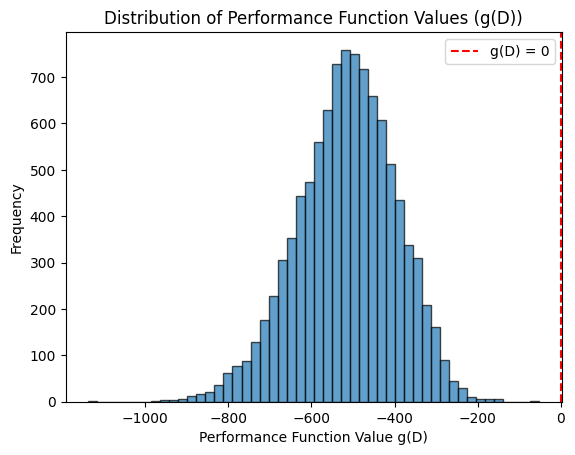

Estimated probability of failure: 1.0000


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Given constants
E = 30e6  # Modulus of elasticity (psi)
L = 100   # Length of the beam (inches)
D0 = 3    # Allowable tip displacement (inches)
w = 2     # Width of the cross section (inches)
t = 4     # Height of the cross section (inches)

# External forces Px and Py with normal distributions
mean_Px = 500  # Mean of Px (lb)
std_Px = 100   # Standard deviation of Px (lb)

mean_Py = 1000 # Mean of Py (lb)
std_Py = 100   # Standard deviation of Py (lb)

# Define performance function (g function)
def performance_function(Px, Py):
    # Displacement formula from the given equation
    displacement = (4 * Px * Py * L**3) / (E * w * t**3)
    return D0 - displacement  # Performance function g(D)

# Generate random samples of Px and Py from normal distributions
num_samples = 10000  # Number of samples for Monte Carlo simulation
Px_samples = np.random.normal(mean_Px, std_Px, num_samples)
Py_samples = np.random.normal(mean_Py, std_Py, num_samples)

# Compute the performance function for each sample
g_values = performance_function(Px_samples, Py_samples)

# Plotting the results (distribution of performance function values)
plt.hist(g_values, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label="g(D) = 0")
plt.xlabel('Performance Function Value g(D)')
plt.ylabel('Frequency')
plt.title('Distribution of Performance Function Values (g(D))')
plt.legend()
plt.show()

# Calculate probability of failure (g(D) <= 0)
failure_probability = np.mean(g_values <= 0)
print(f'Estimated probability of failure: {failure_probability:.4f}')


In [ ]:
import numpy as np
from scipy.stats import norm, lognorm
from scipy.optimize import minimize

# Define the limit state function g(x)
def g(x1, x2):
    return x1**2 + 3*x2**2 - 6

# Define the Rosenblatt transformation
def ros_transformation(x1, x2, mu_x1, sigma_x1, mu_x2, sigma_x2):
    # Apply the CDF transformations to get U1 and U2
    F_X1 = norm.cdf(x1, loc=mu_x1, scale=sigma_x1)
    F_X2 = lognorm.cdf(x2, s=sigma_x2, scale=np.exp(mu_x2))

    # Apply the inverse CDF to get the standard normal variables
    U1 = norm.ppf(F_X1)
    U2 = norm.ppf(F_X2)

    return U1, U2

# Define the optimization function to find the MPP
def mpp_optimization(mu_x1, sigma_x1, mu_x2, sigma_x2):
    # Objective function to minimize (g(x) should be minimized)
    def objective(u):
        # Transform back to original space
        x1 = norm.ppf(norm.cdf(u[0])) * sigma_x1 + mu_x1
        x2 = lognorm.ppf(norm.cdf(u[1]), s=sigma_x2, scale=np.exp(mu_x2))
        return g(x1, x2)

    # Initial guess (start near the origin)
    u_init = np.array([0, 0])

    # Perform optimization (search for MPP)
    result = minimize(objective, u_init, bounds=[(-10, 10), (-10, 10)])

    # Get the MPP
    u_mpp = result.x
    return u_mpp

# Define the function to calculate the reliability
def calculate_reliability(beta):
    # Reliability is the CDF of the standard normal evaluated at beta
    return norm.cdf(beta)

# Define the main function to execute FORM
def form(mu_x1, sigma_x1, mu_x2, sigma_x2):
    # Step 1: Find the MPP in U-space
    u_mpp = mpp_optimization(mu_x1, sigma_x1, mu_x2, sigma_x2)

    # Step 2: Calculate the reliability index beta
    beta = np.linalg.norm(u_mpp)  # Reliability index is the distance from the origin

    # Step 3: Calculate the reliability
    reliability = calculate_reliability(beta)

    return beta, reliability

# Define the parameters of the distributions
mu_x1, sigma_x1 = 2, 1  # Normal distribution parameters
mu_x2, sigma_x2 = 0.5, 0.2  # Lognormal distribution parameters

# Perform FORM analysis
beta, reliability = form(mu_x1, sigma_x1, mu_x2, sigma_x2)

print("Reliability Index (beta):", beta)
print("Reliability (R):", reliability)


Reliability Index (beta): 10.198039031682757
Reliability (R): 1.0
